# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



## **1. Import libraries**

In [ ]:
! pip install lazypredict

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [2]:
! wget https://raw.githubusercontent.com/vdopathi1/bioinformatics_final_project/main/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2025-11-28 04:15:05--  https://raw.githubusercontent.com/vdopathi1/bioinformatics_final_project/main/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15030045 (14M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’

acetylcholinesteras 100%[===================>]  14.33M  --.-KB/s    in 0.1s    

2025-11-28 04:15:05 (131 MB/s) - ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’ saved [15030045/15030045]



In [ ]:
# ! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

In [3]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [4]:
import numpy as np

# Check for infinite values in the entire DataFrame
infinite_values = df.isin([np.inf, -np.inf])

# Count how many infinite values exist per column
infinite_counts = infinite_values.sum()

# Display columns with infinite values and their counts
print("Columns with infinite values and their counts:")
print(infinite_counts[infinite_counts > 0])

# If there are infinite values, you might want to remove or replace them
# For example, to remove rows with any infinite values:
# df_cleaned = df[~infinite_values.any(axis=1)]
# print(f"Original df shape: {df.shape}")
# print(f"Cleaned df shape (after removing rows with inf): {df_cleaned.shape}")

Columns with infinite values and their counts:
pIC50    1
dtype: int64


In [6]:
import numpy as np

# Remove rows where 'pIC50' contains infinite values
df_cleaned = df[~df['pIC50'].isin([np.inf, -np.inf])]

X = df_cleaned.drop('pIC50', axis=1)
Y = df_cleaned.pIC50

## **3. Data pre-processing**

In [8]:
# Examine X dimension
X.shape

(8442, 881)

In [9]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(8442, 139)

In [10]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [11]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 6753, number of used features: 139
[LightGBM] [Info] Start training from score 5.985137
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 6753, number of used features: 139
[LightGBM] [Info] Start training from score 5.985137


In [12]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreeRegressor,0.80,0.80,0.71,0.28
DecisionTreeRegressor,0.80,0.80,0.71,0.26
ExtraTreesRegressor,0.80,0.80,0.71,17.16
GaussianProcessRegressor,0.80,0.80,0.71,35.01
RandomForestRegressor,0.77,0.77,0.76,11.23
BaggingRegressor,0.75,0.76,0.78,3.19
XGBRegressor,0.75,0.75,0.79,0.63
MLPRegressor,0.73,0.73,0.82,15.59
HistGradientBoostingRegressor,0.61,0.62,0.98,1.98


In [13]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.46,0.50,1.08,1.53
XGBRegressor,0.46,0.50,1.08,0.61
RandomForestRegressor,0.45,0.50,1.09,12.93
LGBMRegressor,0.45,0.49,1.09,0.59
BaggingRegressor,0.43,0.48,1.11,1.69
NuSVR,0.42,0.47,1.12,6.25
SVR,0.41,0.46,1.13,8.02
KNeighborsRegressor,0.39,0.44,1.15,0.26
MLPRegressor,0.38,0.43,1.16,15.00


## **5. Data visualization of model performance**

[(0.0, 1.0)]

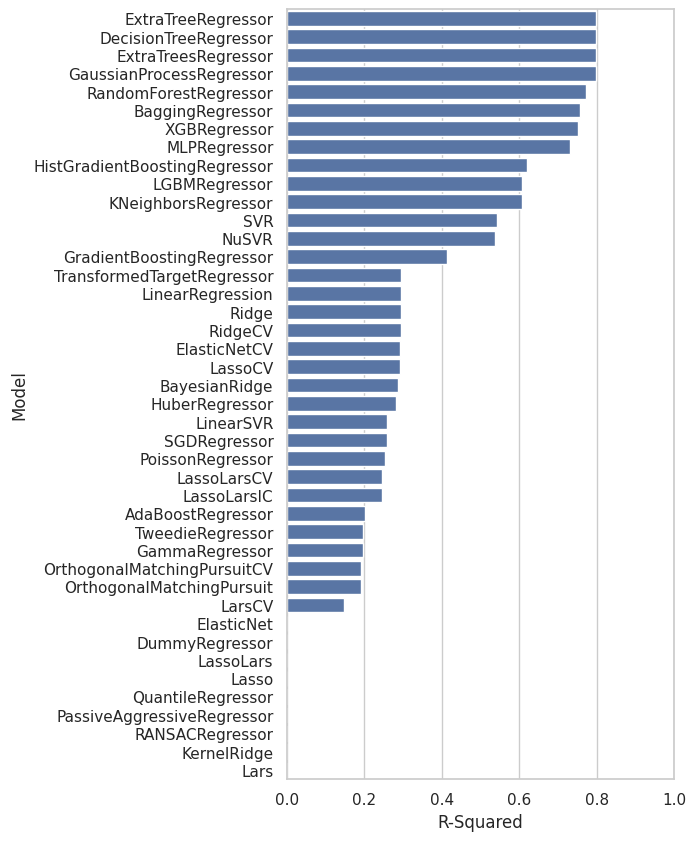

In [14]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

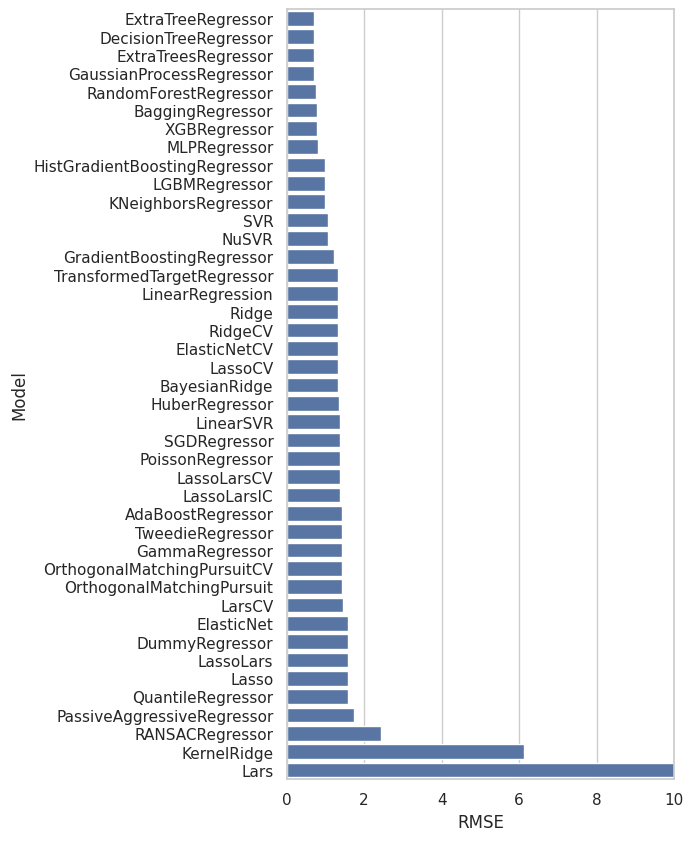

In [15]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

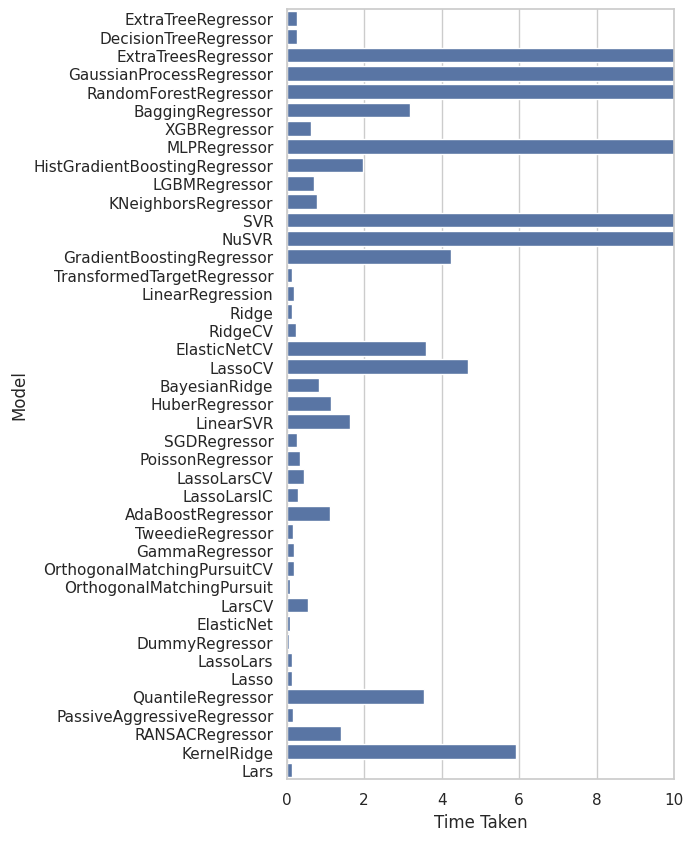

In [16]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))